In [166]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt

# Read annually file
pjf = pd.read_csv('project_1.csv')

print(pjf)

# Display the first few rows of the dataset
df.head()


    Year      GDP USA  Unemployment Rate USA  Pop USA  Employment USA  \
0   2005   13,039.20                    5.08   296.12          141.71   
1   2006   13,815.60                    4.61   298.93          144.42   
2   2007   14,474.25                    4.62   301.90          146.05   
3   2008   14,769.85                    5.80   304.72          145.37   
4   2009   14,478.05                    9.28   307.37          139.89   
5   2010   15,048.98                    9.61   309.74          139.08   
6   2011   15,599.73                    8.93   311.94          139.89   
7   2012   16,253.95                    8.08   314.17          142.48   
8   2013   16,880.68                    7.36   316.33          143.94   
9   2014   17,608.13                    6.16   318.62          146.32   
10  2015   18,295.00                    5.28   320.93          148.85   
11  2016   18,804.90                    4.88   323.22          151.44   
12  2017   19,612.10                    4.36   325.

NameError: name 'df' is not defined

In [142]:
pjf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        15 non-null     int64  
 1   GDP USA                     15 non-null     object 
 2   Unemployment Rate USA       15 non-null     float64
 3   Pop USA                     15 non-null     float64
 4   Employment USA              15 non-null     float64
 5   Total investment USA        15 non-null     float64
 6   GDP Deflactor USA           15 non-null     float64
 7   Real GDP  USA               15 non-null     object 
 8   PCExp USA                   15 non-null     object 
 9   AWHAETP USA                 15 non-null     float64
 10  M2NS USA                    15 non-null     object 
 11  COMPRNFB USA                15 non-null     float64
 12  Capital Stock USA           15 non-null     object 
 13  Capital Stock China         15 non-nu

In [38]:
# Convert GDP and Population columns to numeric values (handling commas if present)
pjf["GDP USA"] = pjf["GDP USA"].replace(",", "", regex=True).astype(float)
pjf["Pop USA"] = pjf["Pop USA"].replace(",", "", regex=True).astype(float)

pjf["GDP CHINA"] = pjf["GDP CHINA"].replace(",", "", regex=True).astype(float)
pjf["Pop CHINA"] = pjf["Pop CHINA"].replace(",", "", regex=True).astype(float)

pjf["GDP Ethiopia"] = pjf["GDP Ethiopia"].replace(",", "", regex=True).astype(float)
pjf["Population Ethiopia"] = pjf["Population Ethiopia"].replace(",", "", regex=True).astype(float)

# Calculate GDP per capita for each country
pjf["GDP per capita USA"] = pjf["GDP USA"] / pjf["Pop USA"]
pjf["GDP per capita China"] = pjf["GDP CHINA"] / pjf["Pop CHINA"]
pjf["GDP per capita Ethiopia"] = pjf["GDP Ethiopia"] / pjf["Population Ethiopia"]

# Display the results
print(pjf[["Year", "GDP per capita USA", "GDP per capita China", "GDP per capita Ethiopia"]])

    Year  GDP per capita USA  GDP per capita China  GDP per capita Ethiopia
0   2005           44.033500              1.742149                 0.181538
1   2006           46.216840              2.084440                 0.218621
2   2007           47.943856              2.677414                 0.266915
3   2008           48.470235              3.429959                 0.350561
4   2009           47.103003              3.795176                 0.373162
5   2010           48.585846              4.472286                 0.341157
6   2011           50.008752              5.512139                 0.377695
7   2012           51.736162              6.245762                 0.510520
8   2013           53.364145              6.992524                 0.548821
9   2014           55.263731              7.608288                 0.622644
10  2015           57.006201              7.982008                 0.707969
11  2016           58.179877              8.018584                 0.790789
12  2017    

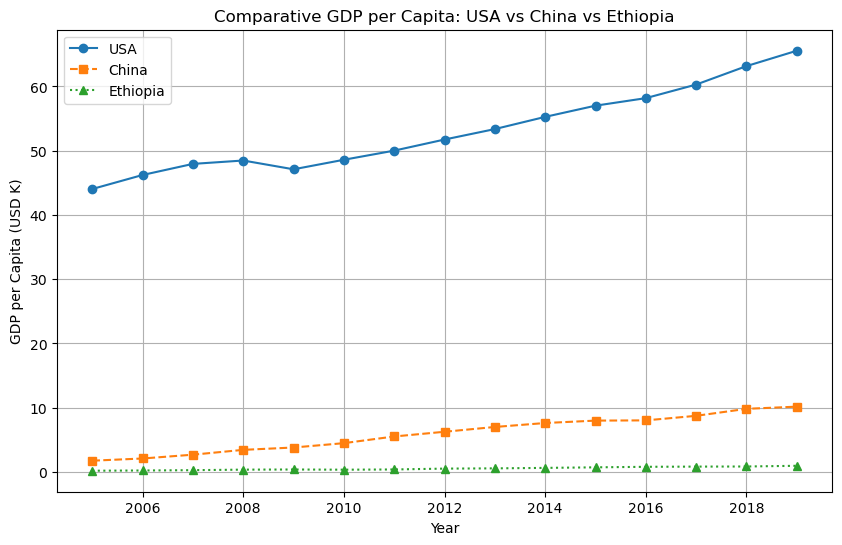

In [40]:
## import matplotlib.pyplot as plt

# Plot GDP per capita for USA, China, and Ethiopia over the years
plt.figure(figsize=(10, 6))  # Set figure size

plt.plot(pjf["Year"], pjf["GDP per capita USA"], label="USA", marker="o", linestyle="-")
plt.plot(pjf["Year"], pjf["GDP per capita China"], label="China", marker="s", linestyle="--")
plt.plot(pjf["Year"], pjf["GDP per capita Ethiopia"], label="Ethiopia", marker="^", linestyle=":")

# Labels and Title
plt.xlabel("Year")
plt.ylabel("GDP per Capita (USD K)")
plt.title("Comparative GDP per Capita: USA vs China vs Ethiopia")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


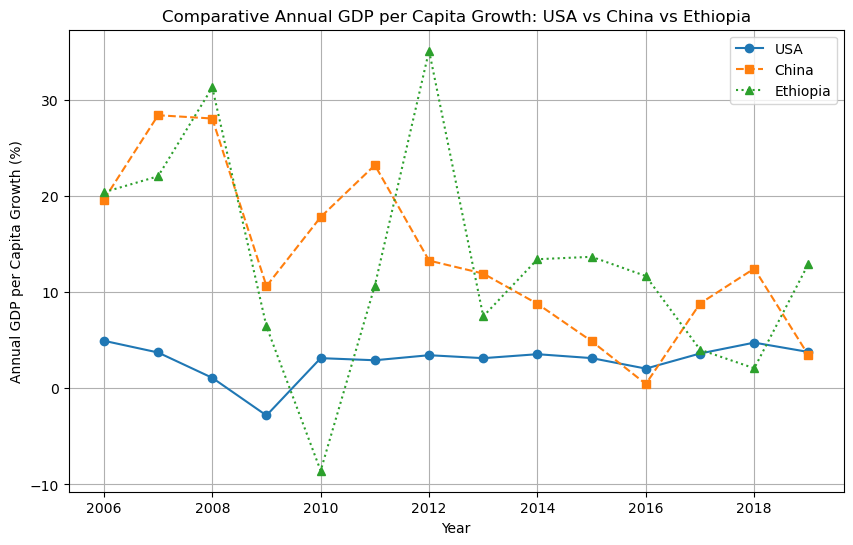

In [42]:
import matplotlib.pyplot as plt

# Compute annual GDP per capita growth rates (% change)
pjf["GDP per capita growth USA"] = pjf["GDP per capita USA"].pct_change() * 100
pjf["GDP per capita growth China"] = pjf["GDP per capita China"].pct_change() * 100
pjf["GDP per capita growth Ethiopia"] = pjf["GDP per capita Ethiopia"].pct_change() * 100

# Plot GDP per capita growth rates
plt.figure(figsize=(10, 6))

plt.plot(pjf["Year"], pjf["GDP per capita growth USA"], label="USA", marker="o", linestyle="-")
plt.plot(pjf["Year"], pjf["GDP per capita growth China"], label="China", marker="s", linestyle="--")
plt.plot(pjf["Year"], pjf["GDP per capita growth Ethiopia"], label="Ethiopia", marker="^", linestyle=":")

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Annual GDP per Capita Growth (%)")
plt.title("Comparative Annual GDP per Capita Growth: USA vs China vs Ethiopia")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

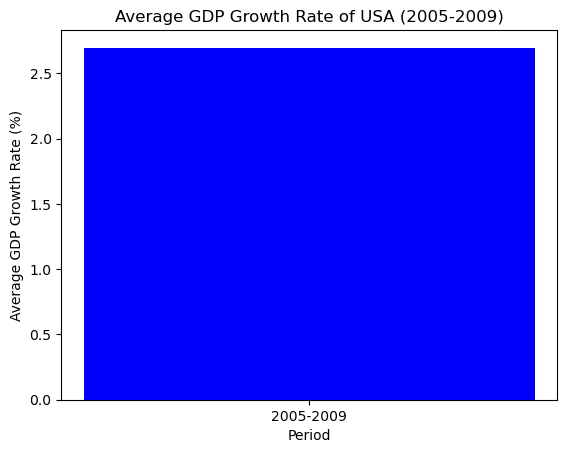

2.6970977360487867

In [32]:
# Convert 'GDP USA' to numeric, handling commas and other non-numeric characters
pjf['GDP USA'] = pd.to_numeric(pjf['GDP USA'].replace(",", "", regex=True), errors='coerce')

# Extract data for the period 2005-2009
data_2005_2009 = pjf[(pjf['Year'] >= 2005) & (pjf['Year'] <= 2009)]

# Calculate the GDP growth rates for each year
growth_rates = data_2005_2009['GDP USA'].pct_change() * 100

# Calculate the average growth rate
average_growth_rate_2005_2009 = growth_rates.mean()

# Plot the average growth rate for the period
plt.bar(['2005-2009'], [average_growth_rate_2005_2009], color='blue')
plt.xlabel('Period')
plt.ylabel('Average GDP Growth Rate (%)')
plt.title('Average GDP Growth Rate of USA (2005-2009)')
plt.show()

# Return the average growth rate for reference
average_growth_rate_2005_2009



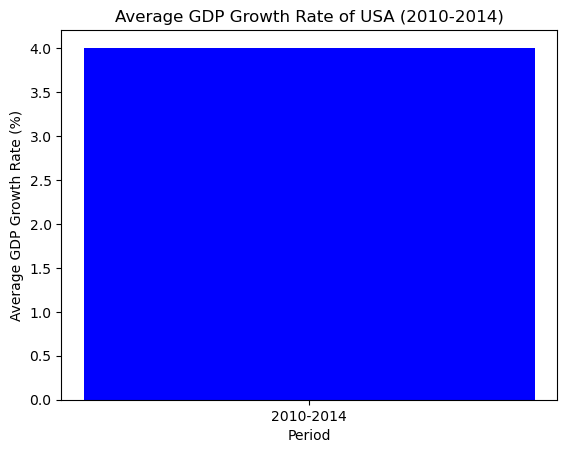

4.004683512373108

In [30]:
# Convert 'GDP USA' to numeric, handling commas and other non-numeric characters
pjf['GDP USA'] = pd.to_numeric(pjf['GDP USA'].replace(",", "", regex=True), errors='coerce')

# Extract data for the period 2010-2014
data_2010_2014 = pjf[(pjf['Year'] >= 2010) & (pjf['Year'] <= 2014)]

# Calculate the GDP growth rates for each year
growth_rates = data_2010_2014['GDP USA'].pct_change() * 100

# Calculate the average growth rate
average_growth_rate_2010_2014 = growth_rates.mean()

# Plot the average growth rate for the period
plt.bar(['2010-2014'], [average_growth_rate_2010_2014], color='blue')
plt.xlabel('Period')
plt.ylabel('Average GDP Growth Rate (%)')
plt.title('Average GDP Growth Rate of USA (2010-2014)')
plt.show()

# Return the average growth rate for reference
average_growth_rate_2010_2014

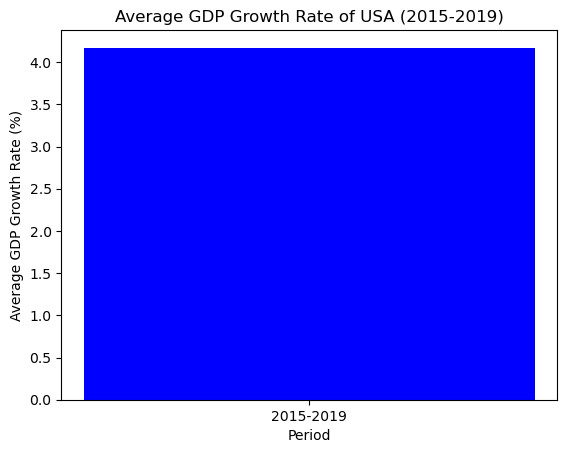

4.170472793358493

In [28]:
# Convert 'GDP USA' to numeric, handling commas and other non-numeric characters
pjf['GDP USA'] = pd.to_numeric(pjf['GDP USA'].replace(",", "", regex=True), errors='coerce')

# Extract data for the period 2015-2019
data_2015_2019 = pjf[(pjf['Year'] >= 2015) & (pjf['Year'] <= 2019)]

# Calculate the GDP growth rates for each year
growth_rates = data_2015_2019['GDP USA'].pct_change() * 100

# Calculate the average growth rate
average_growth_rate_2015_2019 = growth_rates.mean()

# Plot the average growth rate for the period
plt.bar(['2015-2019'], [average_growth_rate_2015_2019], color='blue')
plt.xlabel('Period')
plt.ylabel('Average GDP Growth Rate (%)')
plt.title('Average GDP Growth Rate of USA (2015-2019)')
plt.show()

# Return the average growth rate for reference
average_growth_rate_2015_2019

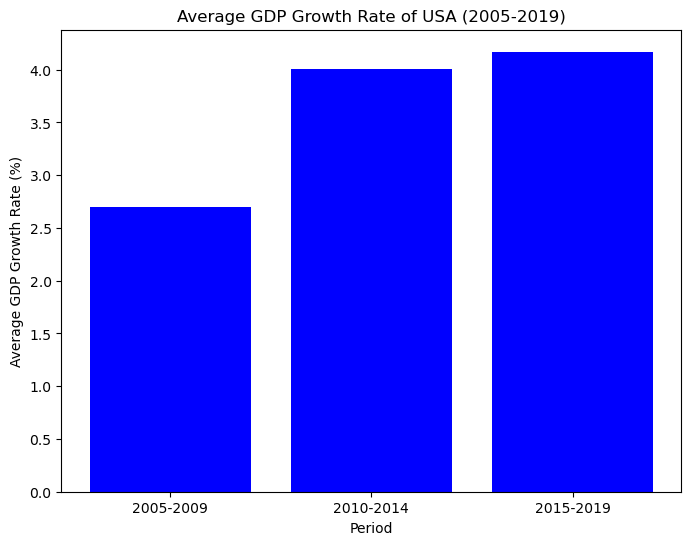

In [26]:
import matplotlib.pyplot as plt

# Data for the average growth rates 
average_growth_rate_2005_2009 = 2.6970977360487867  
average_growth_rate_2010_2014 = 4.004683512373108 
average_growth_rate_2015_2019 = 4.170472793358493  

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Data for the bars
periods = ['2005-2009', '2010-2014', '2015-2019']
growth_rates = [average_growth_rate_2005_2009, average_growth_rate_2010_2014, average_growth_rate_2015_2019]

# Plotting the bars
ax.bar(periods, growth_rates, color='blue')

# Labeling the axes and title
ax.set_xlabel('Period')
ax.set_ylabel('Average GDP Growth Rate (%)')
ax.set_title('Average GDP Growth Rate of USA (2005-2019)')

# Show the plot
plt.show()

In [266]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt

# Read annually file
pjf = pd.read_csv('project_1.csv')

# Convert variables to numeric values (handling commas if present) COMPRNFB USA 
pjf["GDP USA"] = pjf["GDP USA"].replace(",", "", regex=True).astype(float)
pjf["Real GDP  USA"] = pjf["Real GDP  USA"].replace(",", "", regex=True).astype(float)
pjf["Pop USA"] = pjf["Pop USA"].replace(",", "", regex=True).astype(float)
pjf["Unemployment Rate USA"] = pjf["Unemployment Rate USA"].replace(",", "", regex=True).astype(float)
pjf["Total investment USA"] = pjf["Total investment USA"].replace(",", "", regex=True).astype(float)
pjf["GDP CHINA"] = pjf["GDP CHINA"].replace(",", "", regex=True).astype(float)
pjf["Real GDP CHINA"] = pjf["Real GDP CHINA"].replace(",", "", regex=True).astype(float)
pjf["Pop CHINA"] = pjf["Pop CHINA"].replace(",", "", regex=True).astype(float)
pjf["PCExp USA"] = pjf["PCExp USA"].replace(",", "", regex=True).astype(float)
pjf["GDP Ethiopia"] = pjf["GDP Ethiopia"].replace(",", "", regex=True).astype(float)
pjf["Real GDP Ethiopia"] = pjf["Real GDP Ethiopia"].replace(",", "", regex=True).astype(float)
pjf["Population Ethiopia"] = pjf["Population Ethiopia"].replace(",", "", regex=True)
pjf["AWHAETP USA"] = pjf["AWHAETP USA"].replace(",", "", regex=True).astype(float)
pjf["GS3M USA"] = pjf["GS3M USA"].replace(",", "", regex=True).astype(float)
pjf["Capital Stock USA"] = pjf["Capital Stock USA"].replace(",", "", regex=True).astype(float)
pjf["Capital Stock China"] = pjf["Capital Stock China"].replace(",", "", regex=True).astype(float)
pjf["M2NS USA"] = pjf["M2NS USA"].replace(",", "", regex=True).astype(float)
pjf["COMPRNFB USA"] = pjf["COMPRNFB USA"].replace(",", "", regex=True).astype(float)
pjf["M2 % GDP Ethiopia"] = pjf["M2 % GDP Ethiopia"].replace(",", "", regex=True).astype(float)
pjf["M2N CHINA"] = pjf["M2N CHINA"].replace(",", "", regex=True).astype(float)

In [268]:
#GDP USA Annual growth and other variables' correlation 
pjf["GDP USA"] = pjf["GDP USA"].pct_change() 
pjf["Real GDP  USA"] = pjf["Real GDP  USA"].pct_change() 
pjf["Pop USA"] = pjf["Pop USA"].pct_change() 
pjf["PCExp USA"] = pjf["PCExp USA"].pct_change() 
pjf["AWHAETP USA"] = pjf["AWHAETP USA"].pct_change() 
pjf["GS3M USA"] = pjf["GS3M USA"].pct_change() 
pjf["Capital Stock USA"] = pjf["Capital Stock USA"].pct_change()
pjf["M2NS USA"] = pjf["M2NS USA"].pct_change() 
pjf["AWHAETP USA"] = pjf["AWHAETP USA"].pct_change() 
pjf["Unemployment Rate USA"] = pjf["Unemployment Rate USA"].pct_change()
pjf["Total investment USA"] = pjf["Total investment USA"].pct_change()
pjf["COMPRNFB USA"] = pjf["COMPRNFB USA"].pct_change()

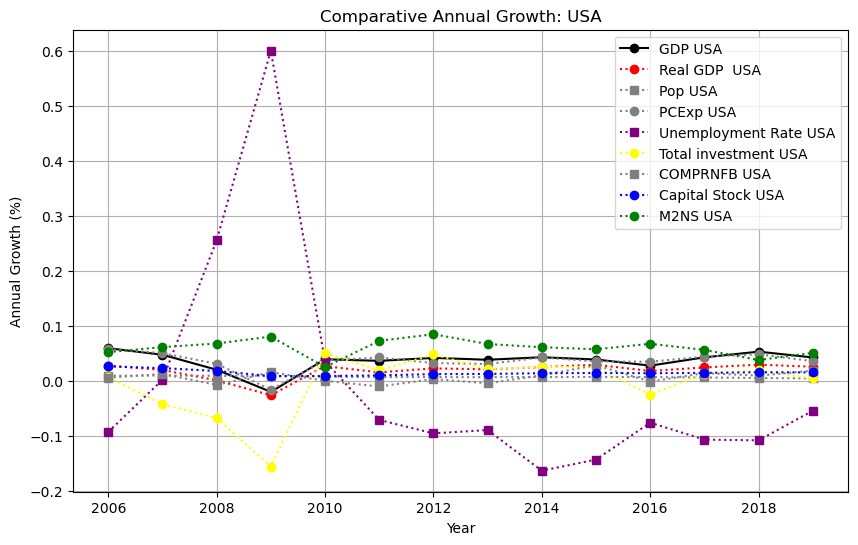

In [270]:
# Plot GDP per capita growth rates 
plt.figure(figsize=(10, 6))

plt.plot(pjf["Year"], pjf["GDP USA"], label="GDP USA", marker="o", linestyle="-", color="black")
plt.plot(pjf["Year"], pjf["Real GDP  USA"], label="Real GDP  USA", marker="o", linestyle=":",color="red")
plt.plot(pjf["Year"], pjf["Pop USA"], label="Pop USA", marker="s", linestyle=":", color="grey")
plt.plot(pjf["Year"], pjf["PCExp USA"], label="PCExp USA", marker="o", linestyle=":", color="grey")
plt.plot(pjf["Year"], pjf["Unemployment Rate USA"], label="Unemployment Rate USA", marker="s", linestyle=":",color="purple")
plt.plot(pjf["Year"], pjf["Total investment USA"], label="Total investment USA", marker="o", linestyle=":",color="yellow")
plt.plot(pjf["Year"], pjf["COMPRNFB USA"], label="COMPRNFB USA", marker="s", linestyle=":",color="grey")
plt.plot(pjf["Year"], pjf["Capital Stock USA"], label="Capital Stock USA", marker="o", linestyle=":",color="blue")
plt.plot(pjf["Year"], pjf["M2NS USA"], label="M2NS USA", marker="o", linestyle=":",color="green")



# Labels and Title
plt.xlabel("Year")
plt.ylabel("Annual Growth (%)")
plt.title("Comparative Annual Growth: USA")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [272]:
#GDP Ethiopia Annual growth and other variables' correlation M2 % GDP Ethiopia
pjf["GDP Ethiopia"] = pjf["GDP Ethiopia"].pct_change() 
pjf["Population Ethiopia"] = pjf["Population Ethiopia"].pct_change() 
pjf["Real GDP Ethiopia"] = pjf["Real GDP Ethiopia"].pct_change() 
pjf["M2 % GDP Ethiopia"] = pjf["M2 % GDP Ethiopia"].pct_change() 
pjf["Tot Inv Ethiopia"] = pjf["Tot Inv Ethiopia"].pct_change()

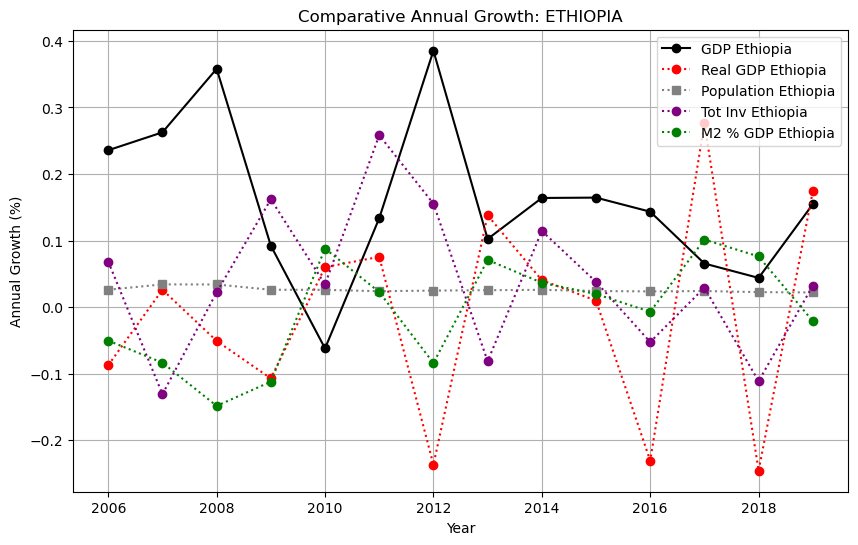

In [274]:
# Ethiopian Plot GDP per capita growth rates 
plt.figure(figsize=(10, 6))

plt.plot(pjf["Year"], pjf["GDP Ethiopia"], label="GDP Ethiopia", marker="o", linestyle="-", color="black")
plt.plot(pjf["Year"], pjf["Real GDP Ethiopia"], label="Real GDP Ethiopia", marker="o", linestyle=":",color="red")
plt.plot(pjf["Year"], pjf["Population Ethiopia"], label="Population Ethiopia", marker="s", linestyle=":", color="grey")
plt.plot(pjf["Year"], pjf["Tot Inv Ethiopia"], label="Tot Inv Ethiopia", marker="o", linestyle=":", color="purple")
plt.plot(pjf["Year"], pjf["M2 % GDP Ethiopia"], label="M2 % GDP Ethiopia", marker="o", linestyle=":",color="green")



# Labels and Title
plt.xlabel("Year")
plt.ylabel("Annual Growth (%)")
plt.title("Comparative Annual Growth: ETHIOPIA")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [276]:
# GS3M CHINA Capital Stock China M2N CHINA
pjf["GDP CHINA"] = pjf["GDP CHINA"].pct_change() 
pjf["Pop CHINA"] = pjf["Pop CHINA"].pct_change()
pjf["Real GDP CHINA"] = pjf["Real GDP CHINA"].pct_change()  
pjf["M2N CHINA"] = pjf["M2N CHINA"].pct_change()
pjf["Tot Invesment CHINA"] = pjf["Tot Invesment CHINA"].pct_change()
pjf["Capital Stock China"] = pjf["Capital Stock China"].pct_change()
pjf["GS3M CHINA"] = pjf["GS3M CHINA"].pct_change()

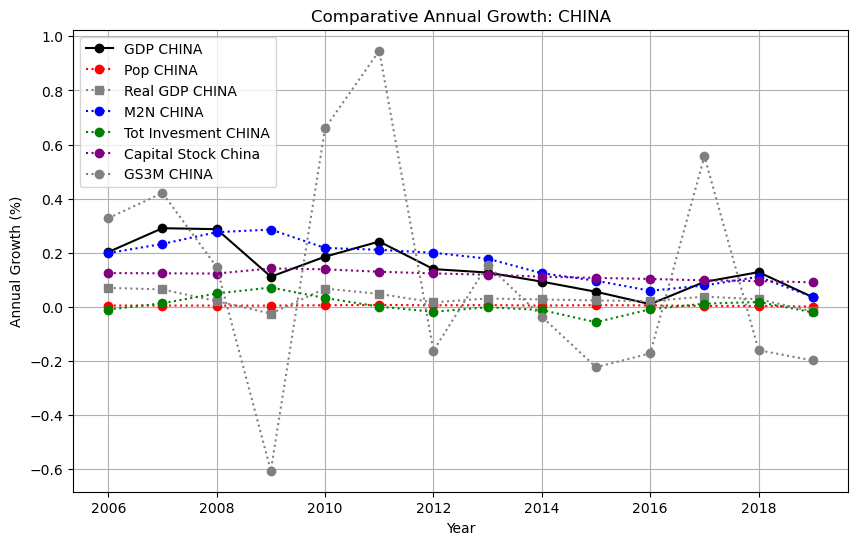

In [278]:
# China Plot GDP per capita growth rates 
plt.figure(figsize=(10, 6))

plt.plot(pjf["Year"], pjf["GDP CHINA"], label="GDP CHINA", marker="o", linestyle="-", color="black")
plt.plot(pjf["Year"], pjf["Pop CHINA"], label="Pop CHINA", marker="o", linestyle=":",color="red")
plt.plot(pjf["Year"], pjf["Real GDP CHINA"], label="Real GDP CHINA", marker="s", linestyle=":", color="grey")
plt.plot(pjf["Year"], pjf["M2N CHINA"], label="M2N CHINA", marker="o", linestyle=":", color="blue")
plt.plot(pjf["Year"], pjf["Tot Invesment CHINA"], label="Tot Invesment CHINA", marker="o", linestyle=":",color="green")
plt.plot(pjf["Year"], pjf["Capital Stock China"], label="Capital Stock China", marker="o", linestyle=":", color="purple")
plt.plot(pjf["Year"], pjf["GS3M CHINA"], label="GS3M CHINA", marker="o", linestyle=":", color="grey")



# Labels and Title
plt.xlabel("Year")
plt.ylabel("Annual Growth (%)")
plt.title("Comparative Annual Growth: CHINA")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

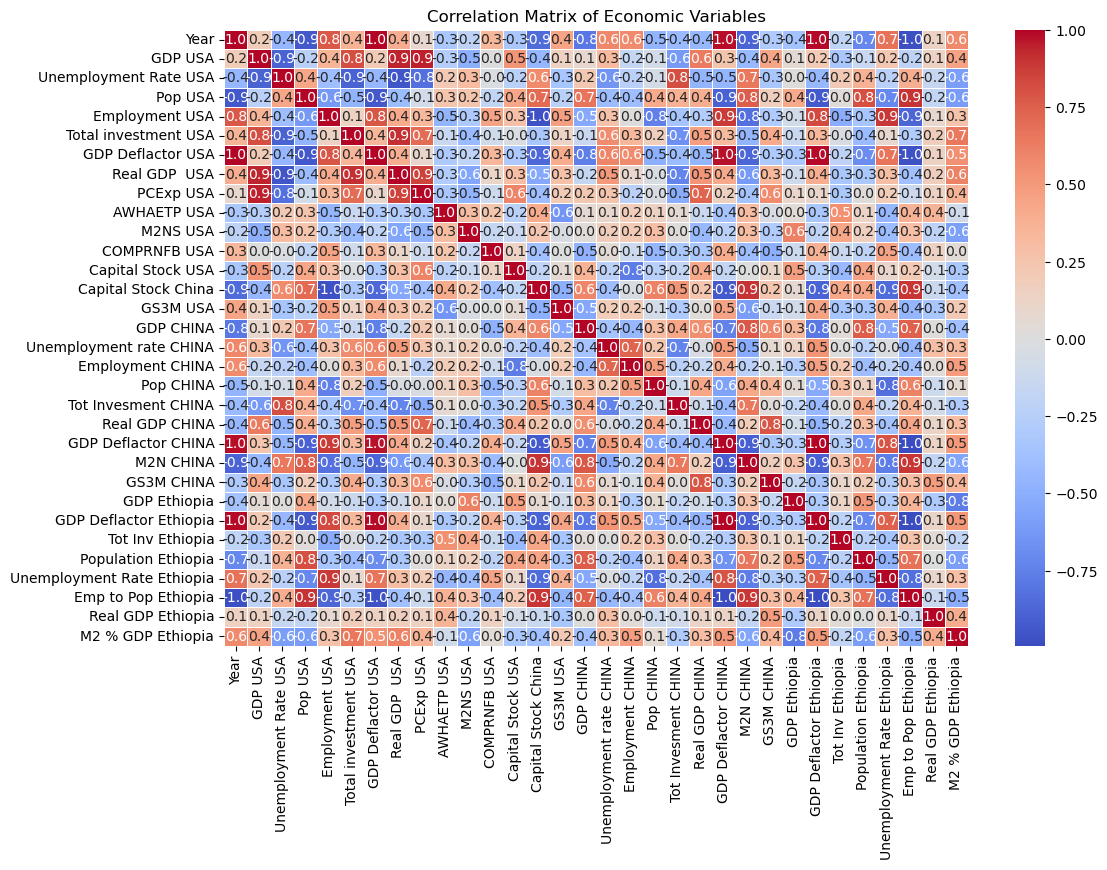

In [294]:
import seaborn as sns

# Creating a correlation matrix
correlation_matrix = pjf.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".00001f", cmap="coolwarm", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Matrix of Economic Variables")

plt.show()